# 1.Загрузить файл hr.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics
import seaborn as sns
df=pd.read_csv("HR.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Объём данных: 14999


satisfaction_level   last_evaluation  \
Перевод                 Уровень удовлетворённости  Последняя оценка   
Минимум                                      0.09              0.36   
Медиана                                      0.64              0.72   
Среднее                                  0.612834          0.716102   
Максимум                                        1                 1   
Мода                                          0.1              0.55   
Стандартное отклонение                   0.248622          0.171163   
Количество значений                            92                65   
Отсутствующие значения                          0                 0   
Выборсы за 3 сигмы                              0                 0   
Выборсы за 2 сигмы                            888                77   

                             number_project             average_montly_hours  \
Перевод                 Количество проектов  Среднемесячное количество часов   
Минимум                                   2                               96   
Медиана                                   4                              200   
Среднее                             3.80305                           201.05   
Максимум                                  7                              310   
Мода                                      4                                -   
Стандартное отклонение              1.23255                          49.9414   
Количество значений                       6                              215   
Отсутствующие значения                    0                                0   
Выборсы за 3 сигмы                        0                                0   
Выборсы за 2 сигмы                      256                              248   

                       time_spend_company      Work_accident      left  \
Перевод                       Срок работы  Несчастный случай    Уволен   
Минимум                                 2                  0         0   
Медиана                                 3                  0         0   
Среднее                           3.49823            0.14461  0.238083   
Максимум                               10                  1         1   
Мода                                    3                  0         0   
Стандартное отклонение            1.46009           0.351707   0.42591   
Количество значений                     8                  2         2   
Отсутствующие значения                  0                  0         0   
Выборсы за 3 сигмы                    376                  0         0   
Выборсы за 2 сигмы                    564               2169         0   

                       promotion_last_5years  
Перевод                   Повышение за 5 лет  
Минимум                                    0  
Медиана                                    0  
Среднее                            0.0212681  
Максимум                                   1  
Мода                                       0  
Стандартное отклонение              0.144277  
Количество значений                        2  
Отсутствующие значения                     0  
Выборсы за 3 сигмы                       319  
Выборсы за 2 сигмы                       319

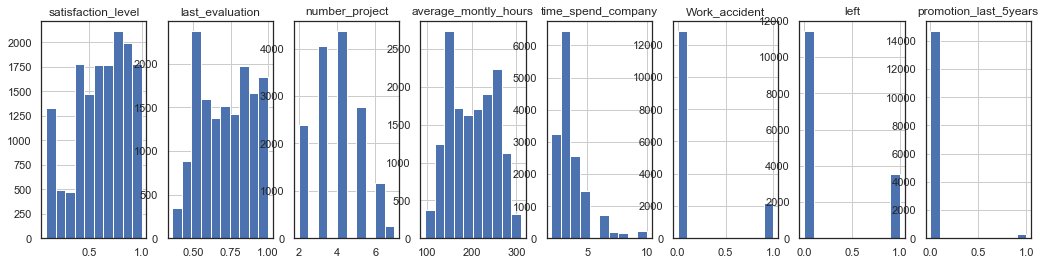

In [24]:
headers=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']
headers_rus=['Уровень удовлетворённости','Последняя оценка','Количество проектов','Среднемесячное количество часов','Срок работы','Несчастный случай','Уволен','Повышение за 5 лет']
spec=headers_rus
k=[]
for i in headers:
    k+=[min(df[i])]
spec=[spec,k]
k=[]
for i in headers:
    k+=[statistics.median(df[i])]
spec+=[k]
k=[]
for i in headers:
    k+=[statistics.mean(df[i])]
spec+=[k]
k=[]
for i in headers:
    k+=[max(df[i])]
spec+=[k]
k=[]
for i in headers:
    try:
        k+=[statistics.mode(df[i])]
    except:
        k+=['-']
spec+=[k]
k=[]
for i in headers:
    k+=[statistics.pstdev(df[i])]
spec+=[k]
k=[]
for i in headers:
    h=set()
    for n in df[i]:
        h.add(n)
    k+=[len(h)]
spec+=[k]
k=[]
for i in headers:
    k+=[df[i].isnull().sum()]
spec+=[k]
k=[]
for i in headers:
    mean = statistics.mean(df[i])
    sigma = statistics.pstdev(df[i])
    k+=[df[i][df[i]<=mean-3*sigma].count()+df[i][df[i]>=mean+3*sigma].count()]
spec+=[k]
k=[]
l=1
for i in headers:
    l+=1
    mean = statistics.mean(df[i])
    sigma = statistics.pstdev(df[i])
    k+=[df[i][df[i]<=mean-2*sigma].count()+df[i][df[i]>=mean+2*sigma].count()]
    plt.subplot(1, len(headers)+1, l)
    df[i].hist(figsize=(20,4), label=i)
    plt.title(i)
spec+=[k]
print('Объём данных:',len(df))
spec=pd.DataFrame(spec, index = ['Перевод','Минимум','Медиана', 'Среднее', 'Максимум', 'Мода', 'Стандартное отклонение', 'Количество значений', 'Отсутствующие значения', 'Выборсы за 3 сигмы', 'Выборсы за 2 сигмы'], columns=headers)
spec

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

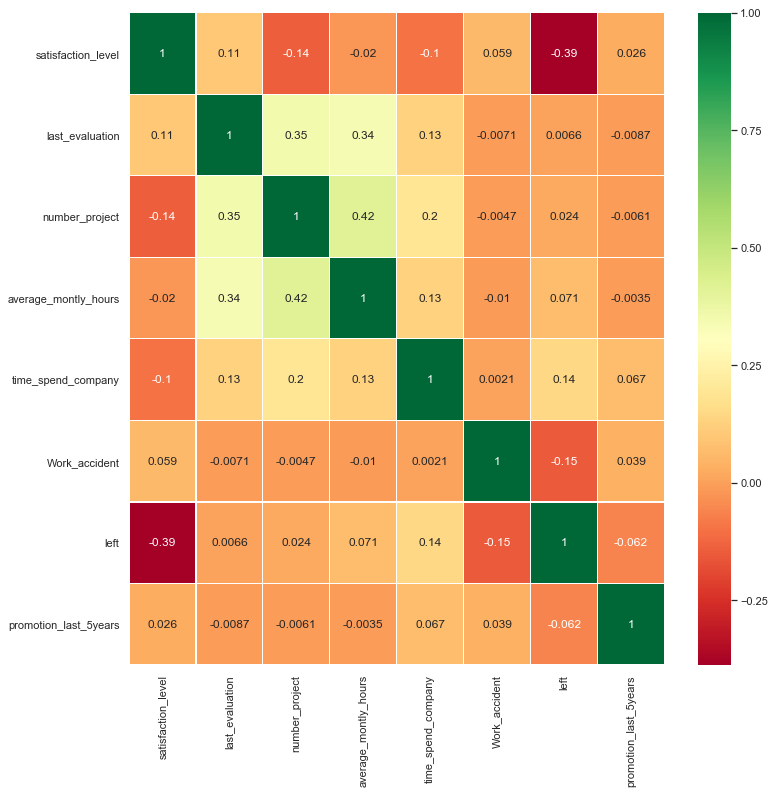

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


# 4.Визуализировать несколько взаимосвязей между переменными.


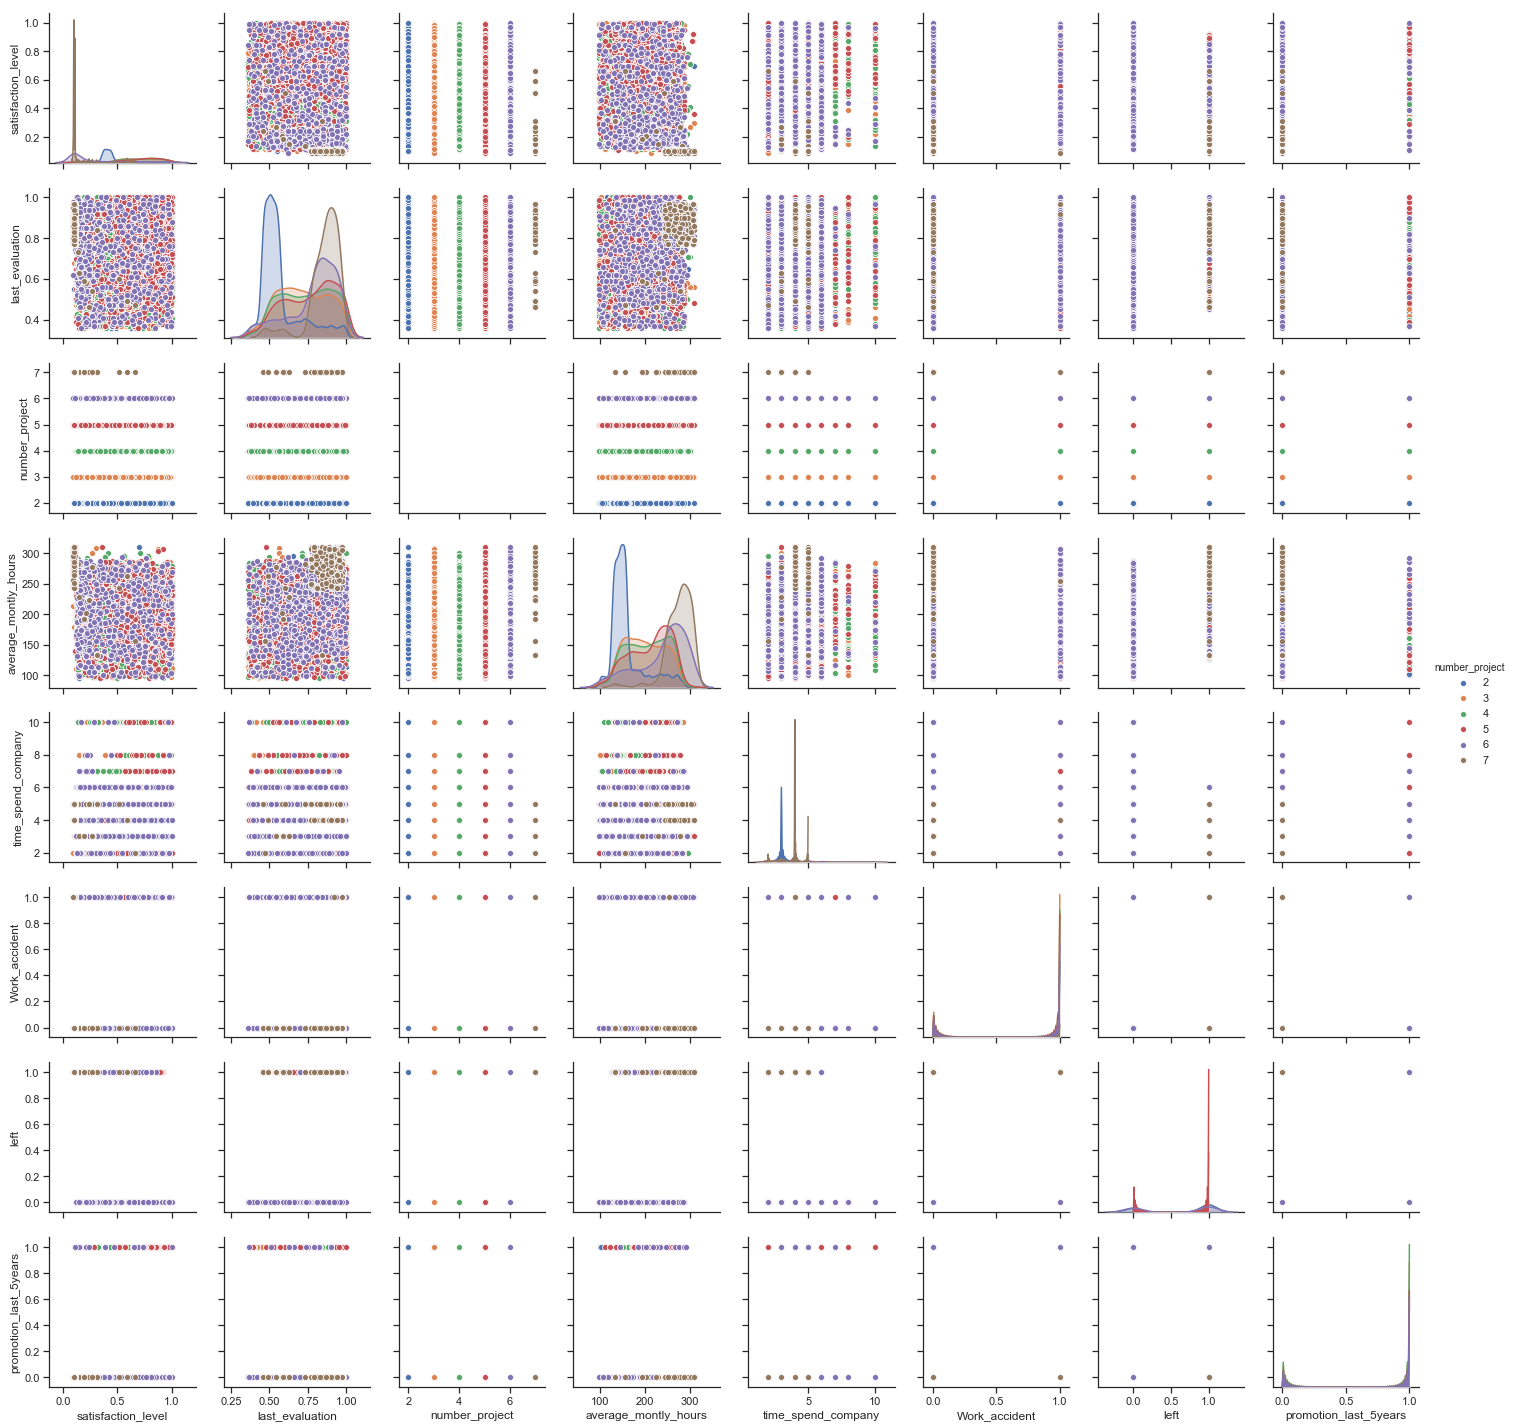

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='number_project')

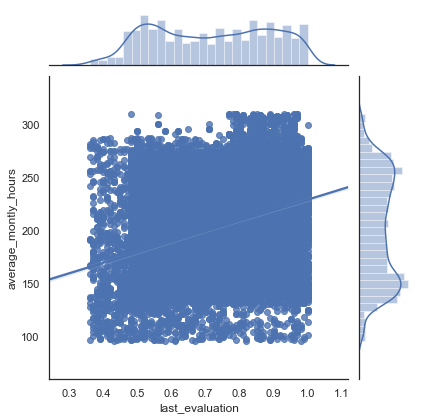

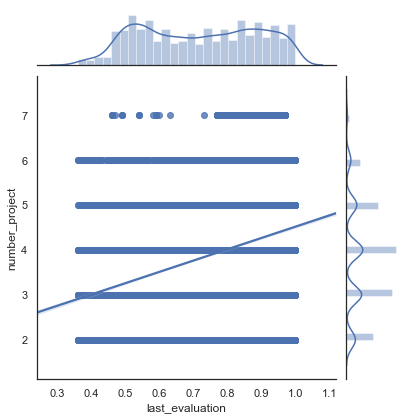

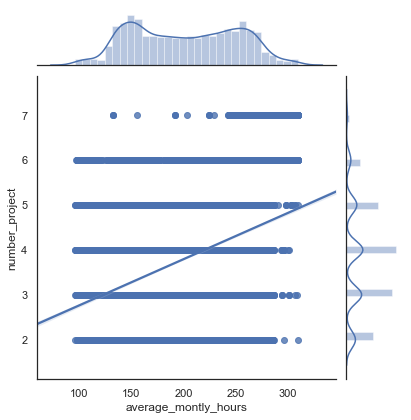

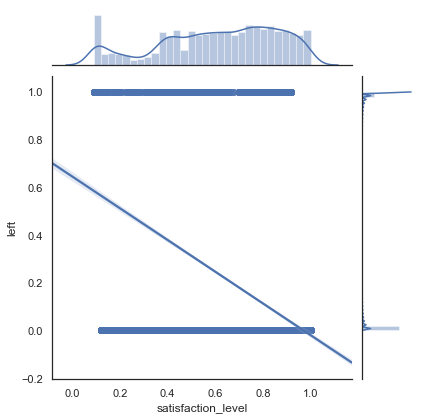

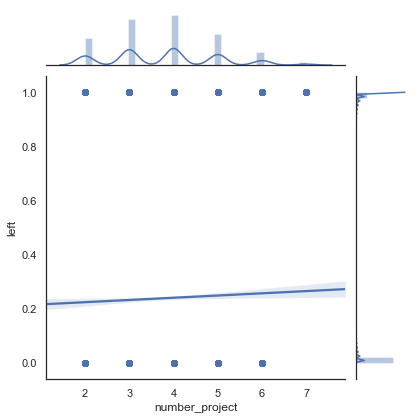

In [6]:
satisfaction_level = df['satisfaction_level']
number_project = df['number_project']
left = df['left']
last_evaluation = df['last_evaluation']
average_montly_hours = df['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=last_evaluation, y=average_montly_hours, data=df, kind='reg')

g = sns.jointplot(x=last_evaluation, y=number_project, data=df, kind='reg')

g = sns.jointplot(x=average_montly_hours, y=number_project, data=df, kind='reg')

g = sns.jointplot(x=satisfaction_level, y=left, data=df, kind='reg')

g = sns.jointplot(x=number_project, y=left, data=df, kind='reg')

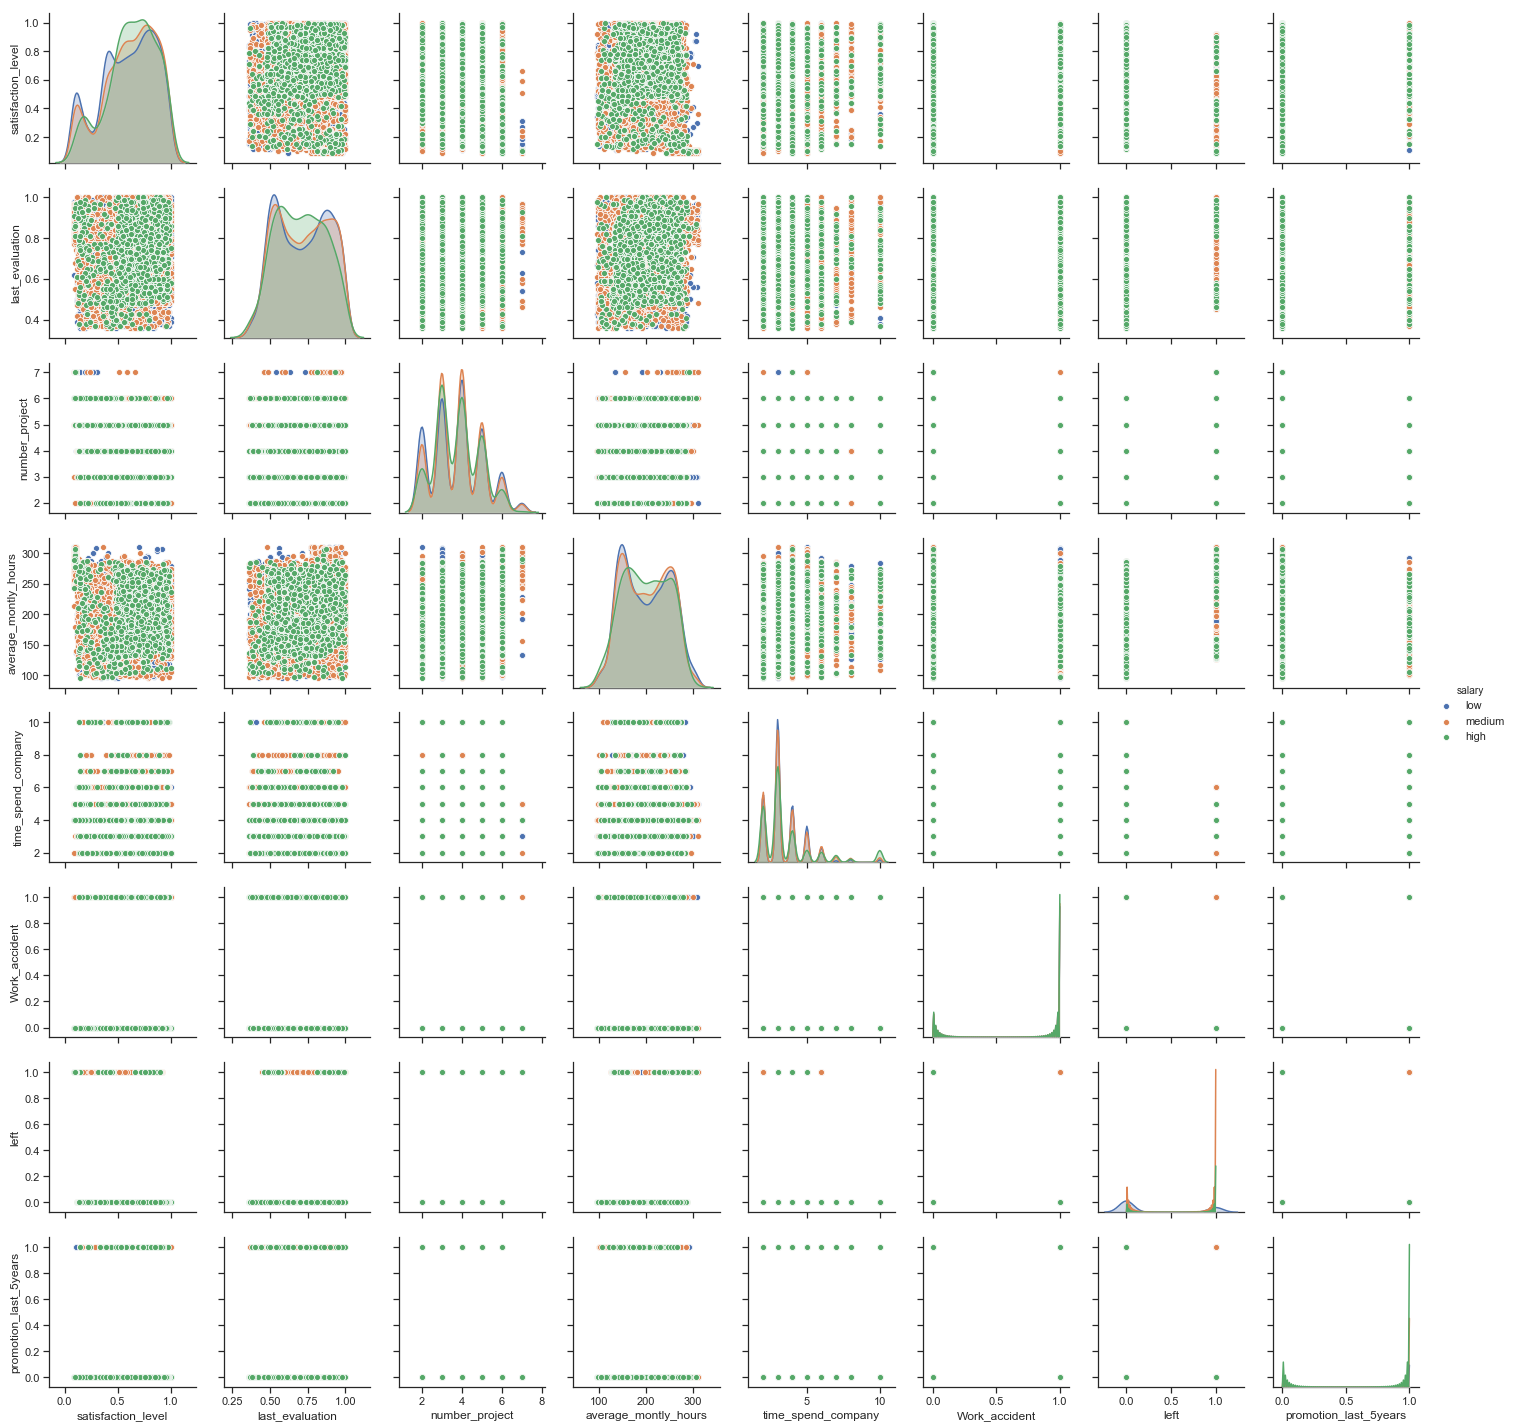

In [6]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='salary')

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [72]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
last_evaluation1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(last_evaluation)))
number_project1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(number_project)))
average_montly_hours1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(average_montly_hours)))
satisfaction_level1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(satisfaction_level)))
left1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(left)))

print(stats.mannwhitneyu(last_evaluation1[0], average_montly_hours1[0]))
print(stats.mannwhitneyu(last_evaluation1[0], number_project1[0]))
print(stats.mannwhitneyu(average_montly_hours1[0], number_project1[0]))
print(stats.mannwhitneyu(satisfaction_level1[0], left1[0]))
print(stats.mannwhitneyu(number_project1[0], left1[0]))

C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MannwhitneyuResult(statistic=5649841.0, pvalue=3.8572682219587584e-17)
MannwhitneyuResult(statistic=4497210.5, pvalue=7.337447792279818e-105)
MannwhitneyuResult(statistic=4871753.0, pvalue=6.4899129422683595e-68)
MannwhitneyuResult(statistic=13830561.0, pvalue=0.0)
MannwhitneyuResult(statistic=21248791.0, pvalue=3.953184805109918e-126)


In [ ]:
Взаимосвязей нет

# 6.Рассчитать сколько работников работает в каждом департаменте.


# 7.Показать распределение сотрудников по зарплатам.

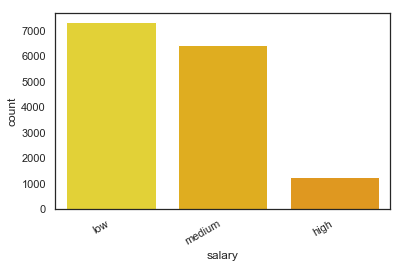

In [29]:
fig,ax=plt.subplots()
sns.countplot(x='salary',data=df,palette='Wistia')
fig.autofmt_xdate()

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

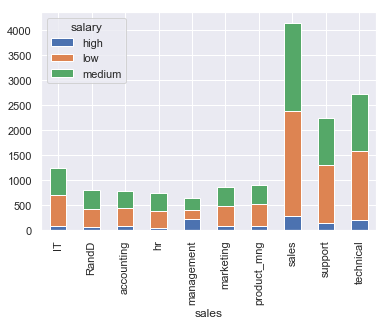

In [45]:
df_plot = df.groupby(['salary', 'sales']).size().reset_index().pivot(columns='salary', index='sales', values=0)
df_plot.plot(kind='bar', stacked=True)

# 9.Сколько сотрудников покинули компанию.

In [49]:
df[df['left']==1]['left'].count()

3571

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

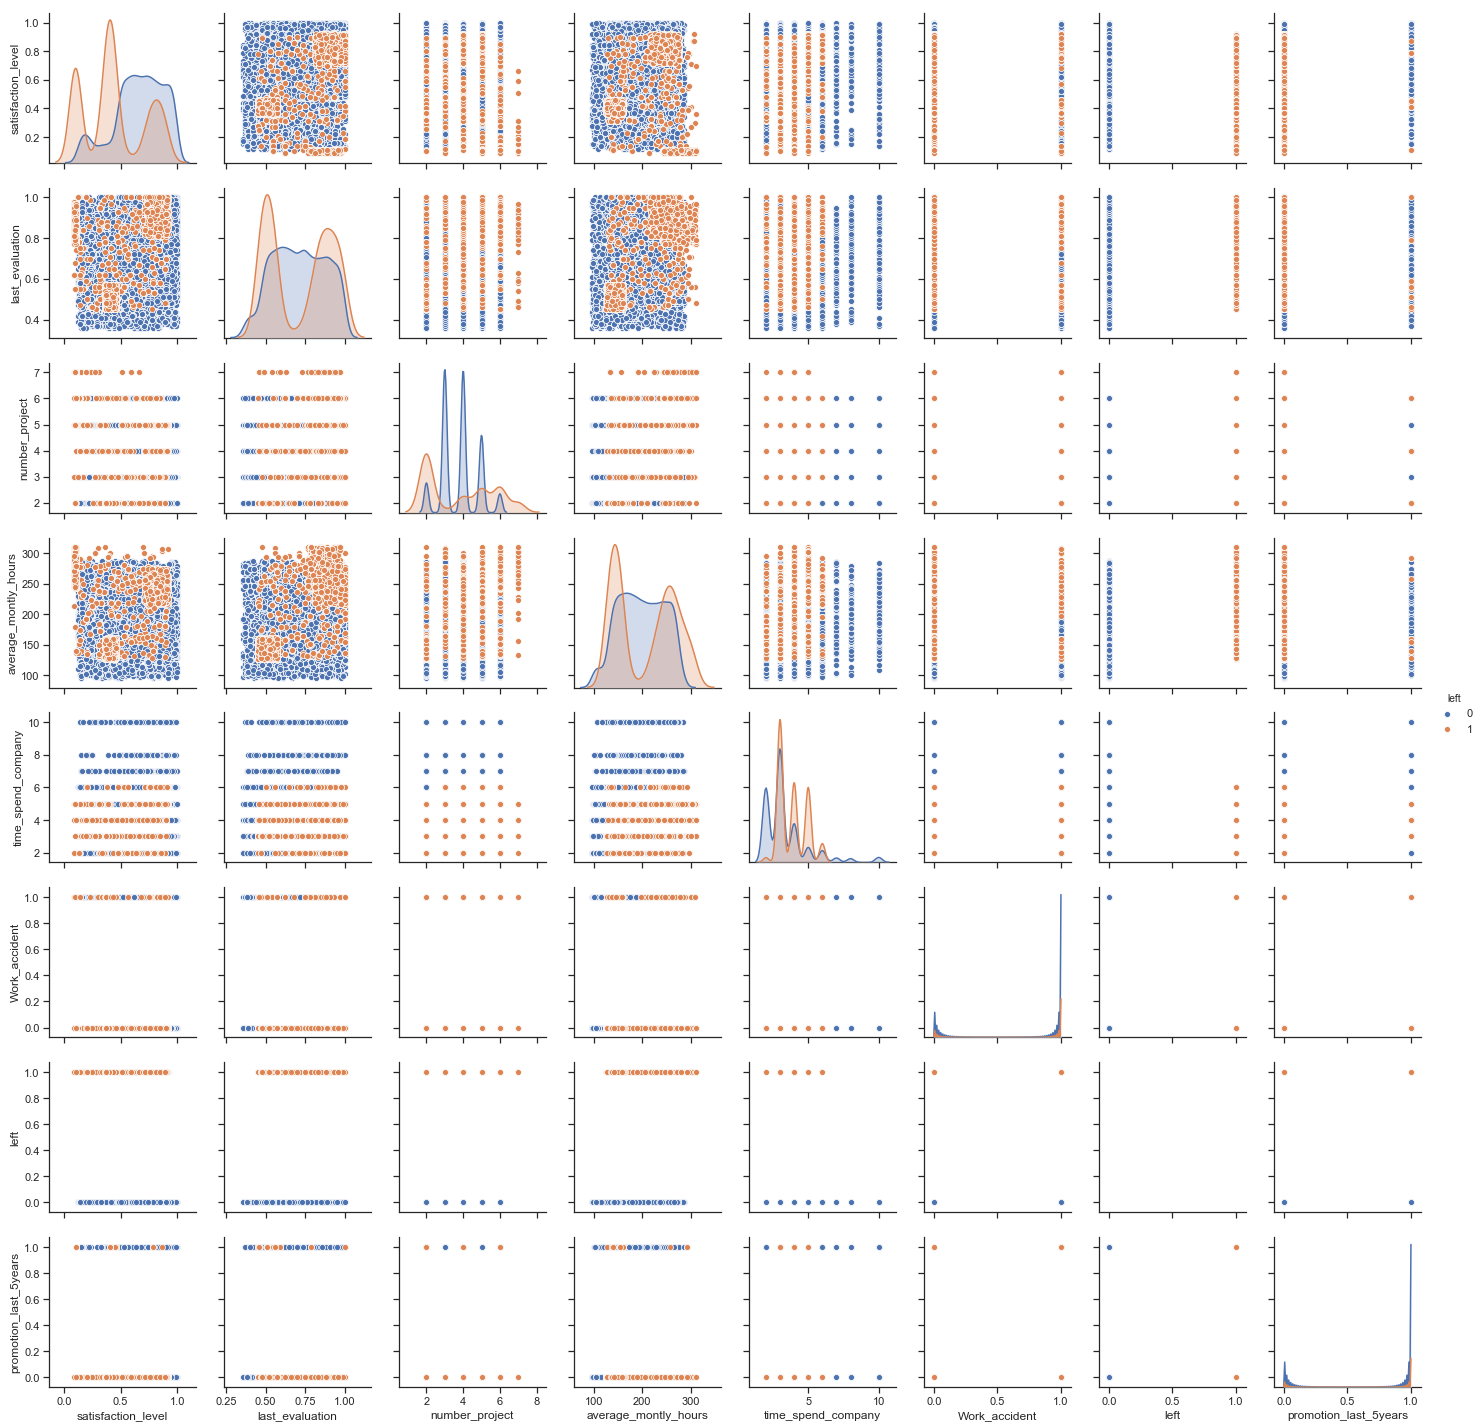

In [51]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='left')

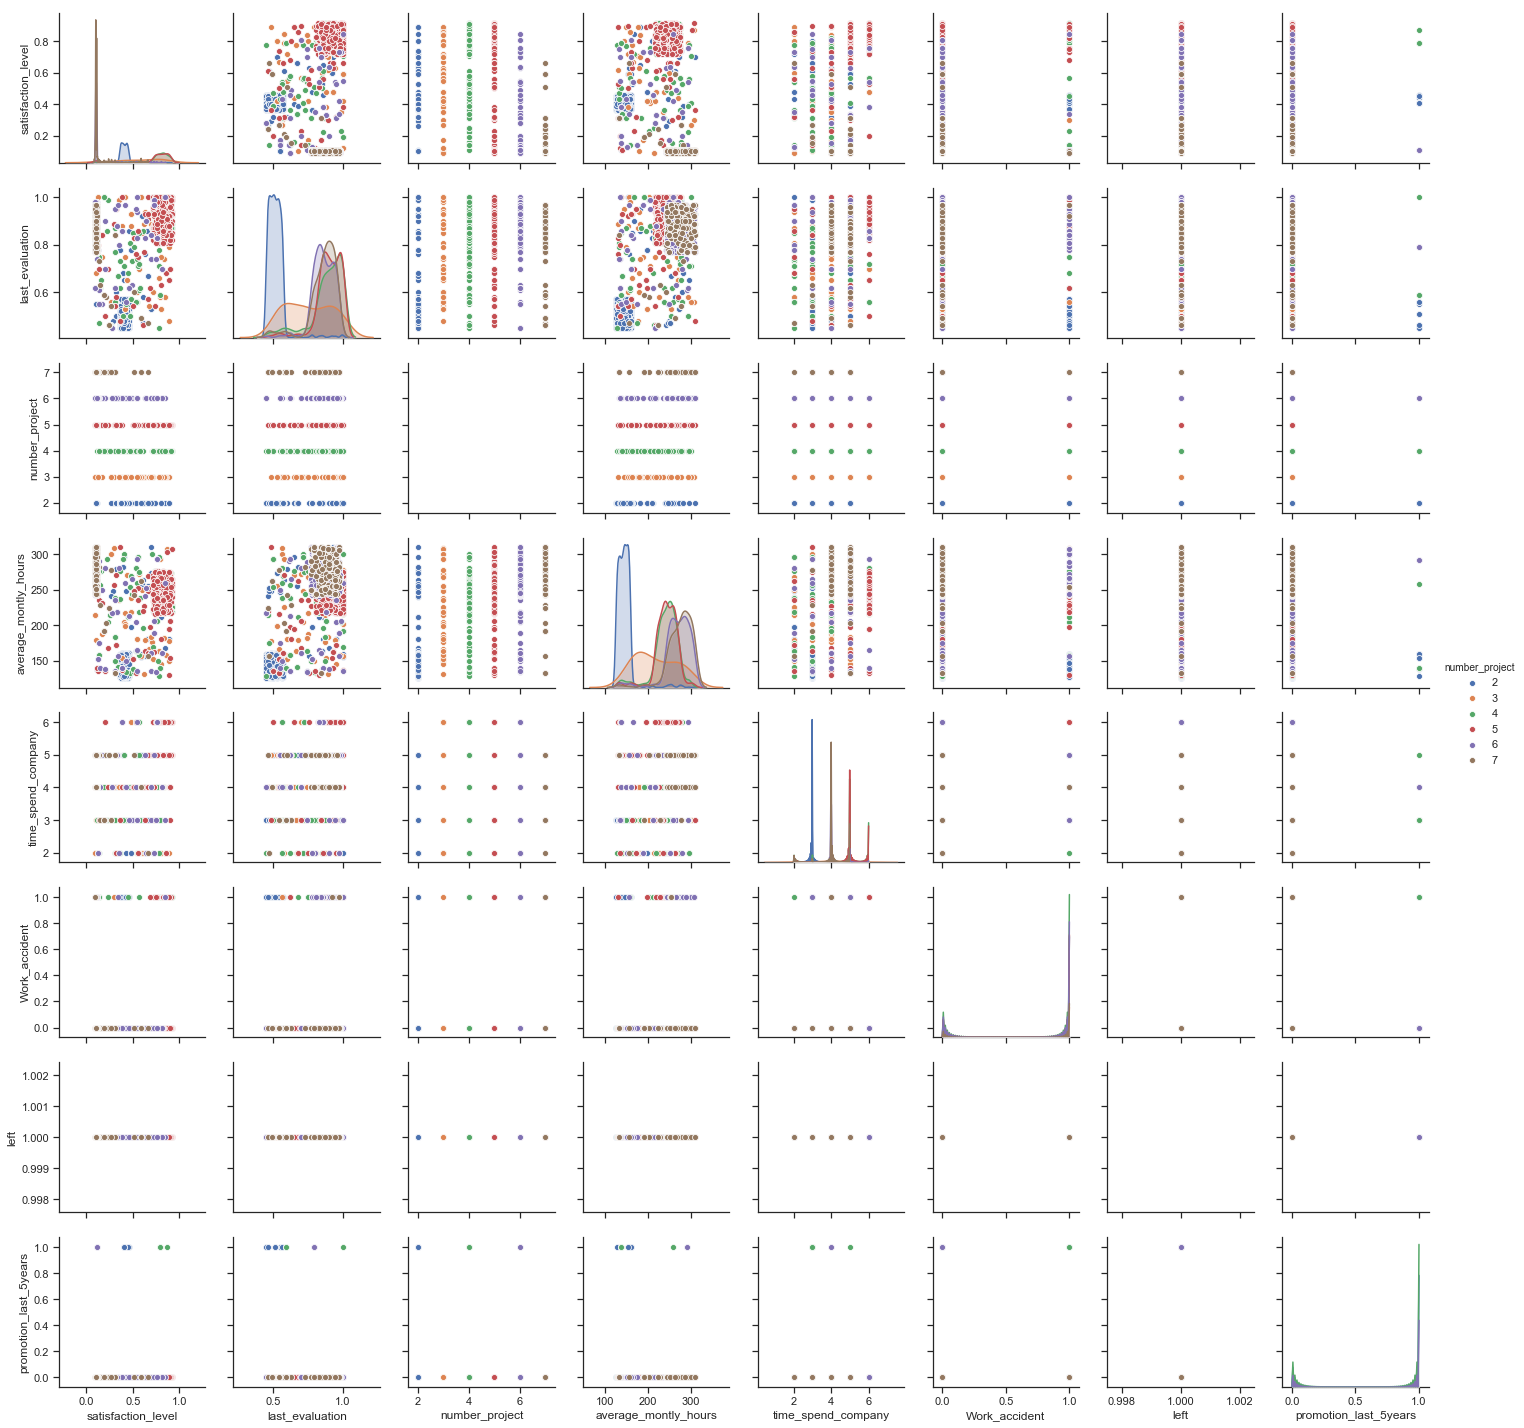

In [69]:
df_left=df[df['left']==1]
df_not_left=df[df['left']==0]
g = sns.pairplot(data=df_left, hue='number_project')


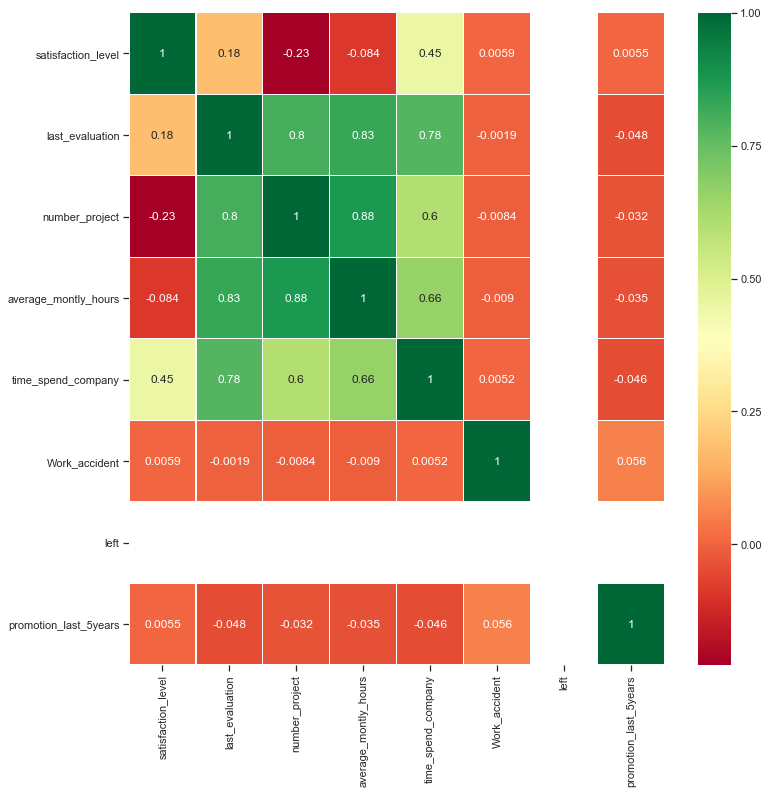

In [54]:
sns.heatmap(df_left.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Посмотрим коррелирующие данные и сравним их с продолжающими работать сотрудниками

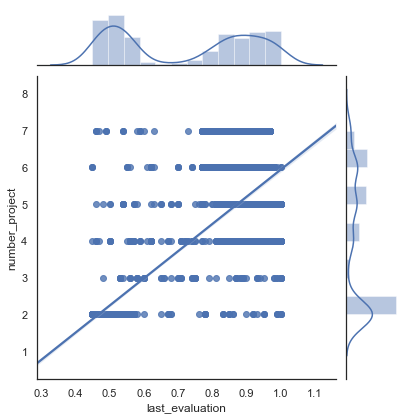

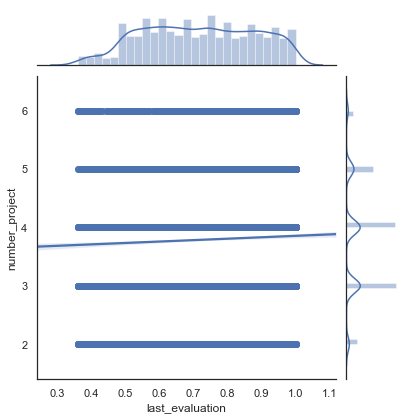

In [73]:
last_evaluation = df_left['last_evaluation']
number_project = df_left['number_project']
average_montly_hours = df_left['average_montly_hours']
time_spend_company = df_left['time_spend_company']
satisfaction_level = df_left['satisfaction_level']


sns.set(style="white", color_codes=True)
g = sns.jointplot(x=last_evaluation, y=number_project, data=df_left, kind='reg')
g = sns.jointplot(x=df_not_left['last_evaluation'], y=df_not_left['number_project'], data=df_not_left, kind='reg')

Компанию покидают две категории: наиболее продуктивные сотрудники с высокой оценкой и наименее продуктивные с низкой оценкой.

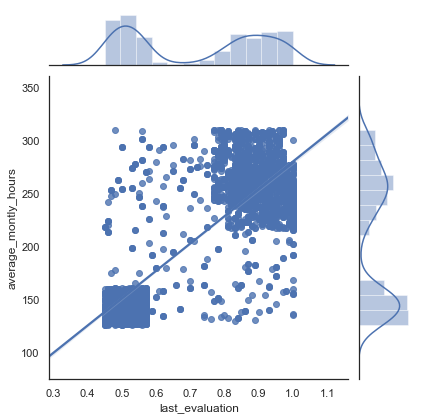

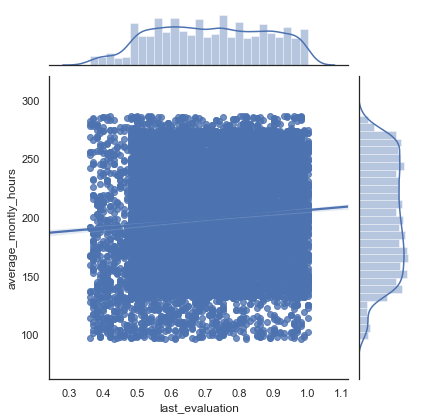

In [77]:
g = sns.jointplot(x=last_evaluation, y=average_montly_hours, data=df_left, kind='reg')
g = sns.jointplot(x=df_not_left['last_evaluation'], y=df_not_left['average_montly_hours'], data=df_not_left, kind='reg')

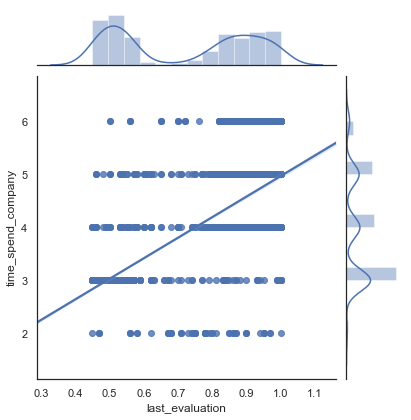

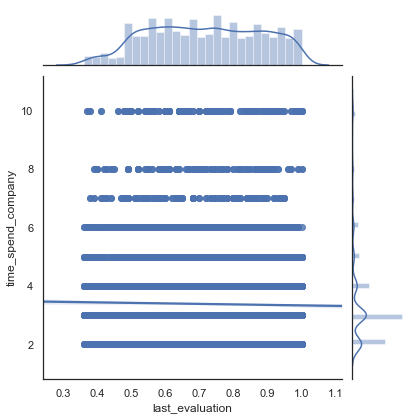

In [79]:
g = sns.jointplot(x=last_evaluation, y=time_spend_company, data=df_left, kind='reg')
g = sns.jointplot(x=df_not_left['last_evaluation'], y=df_not_left['time_spend_company'], data=df_not_left, kind='reg')

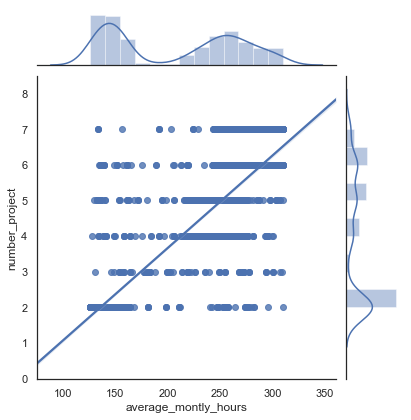

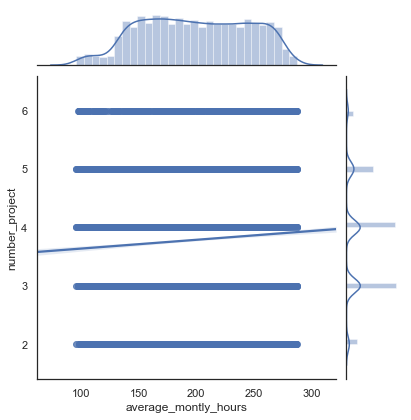

In [78]:
g = sns.jointplot(x=average_montly_hours, y=number_project, data=df_left, kind='reg')
g = sns.jointplot(x=df_not_left['average_montly_hours'], y=df_not_left['number_project'], data=df_not_left, kind='reg')

## Попробуем выделить группу риска

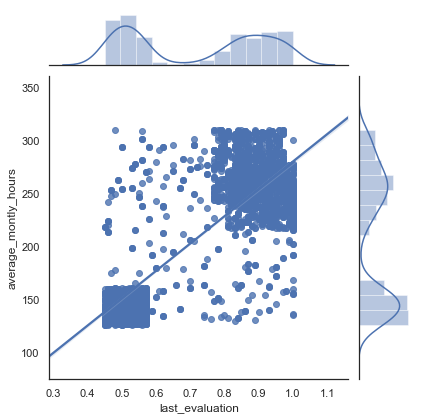

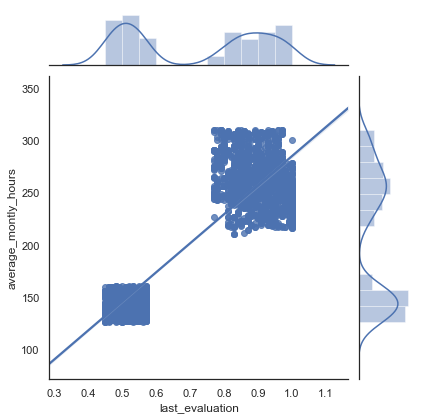

In [104]:
df_filtered=df_left[((df_left['last_evaluation']>0.75) & (df_left['average_montly_hours']>210)) | ((df_left['last_evaluation']<0.59)  & (df_left['average_montly_hours']<165))]
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['average_montly_hours'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered['last_evaluation'], y=df_filtered['average_montly_hours'], data=df_filtered, kind='reg')

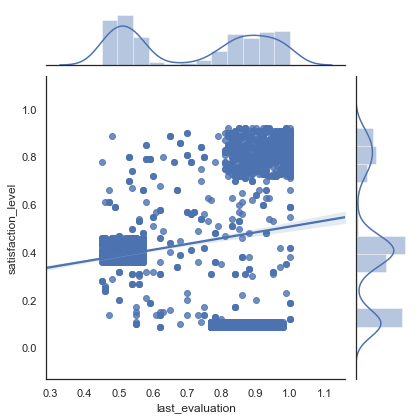

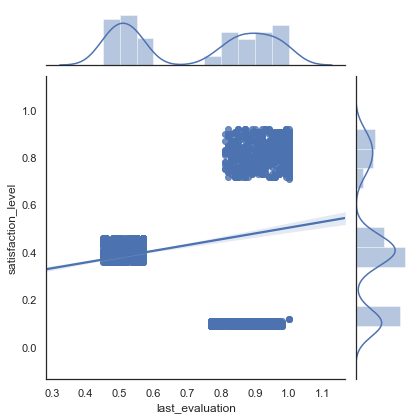

In [134]:
df_filtered2=df_filtered[(
    (
        (
            (df_filtered['last_evaluation']>0.80) & (df_filtered['satisfaction_level']>0.7)
        ) 
        | 
        (
            (df_filtered['last_evaluation']>0.76) & (df_filtered['satisfaction_level']<0.17)
        )
    )
    | 
    (
        ((df_filtered['last_evaluation']<0.6) & (df_filtered['satisfaction_level']<0.5))
         & (df_filtered['satisfaction_level']>0.35)
    )
      )]
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered2['last_evaluation'], y=df_filtered2['satisfaction_level'], data=df_filtered2, kind='reg')

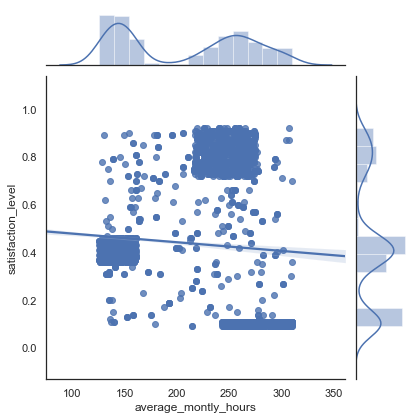

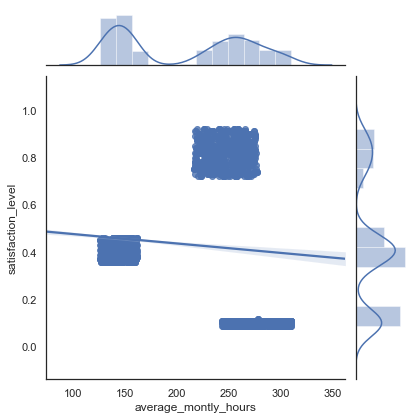

In [130]:
df_filtered3=df_filtered2[(
    (
        (
           ((df_filtered2['average_montly_hours']<330) & (df_filtered2['satisfaction_level']<0.13))
         & ((df_filtered2['average_montly_hours']>240) & (df_filtered2['satisfaction_level']>0))
        ) 
        | 
        (
           ((df_filtered2['average_montly_hours']<170) & (df_filtered2['satisfaction_level']<0.5))
         & ((df_filtered2['average_montly_hours']>125) & (df_filtered2['satisfaction_level']>0.34))
        )
    )
    | 
    (
        ((df_filtered2['average_montly_hours']<279) & (df_filtered2['satisfaction_level']<0.95))
         & ((df_filtered2['average_montly_hours']>215) & (df_filtered2['satisfaction_level']>0.7))
    )
      )]
g = sns.jointplot(x=df_left['average_montly_hours'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered3['average_montly_hours'], y=df_filtered3['satisfaction_level'], data=df_filtered3, kind='reg')

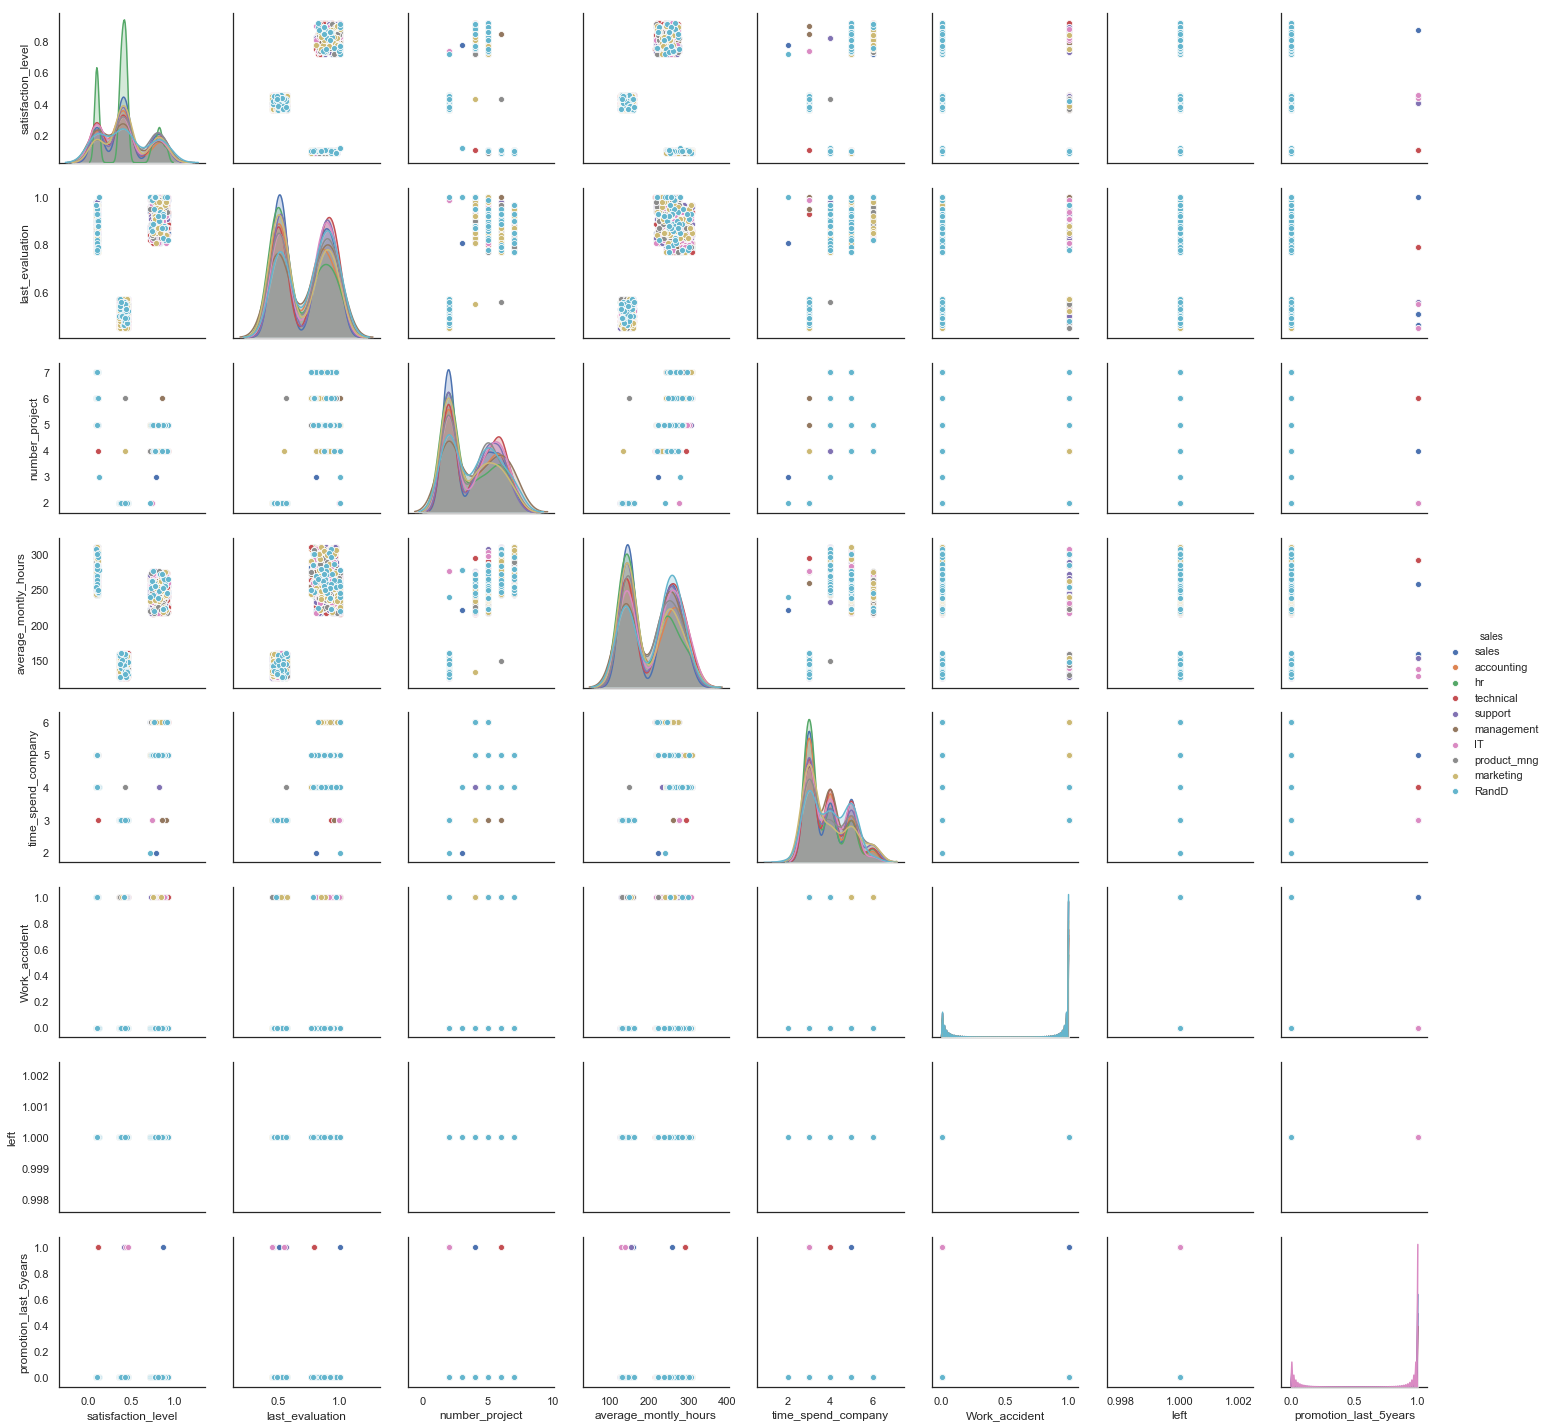

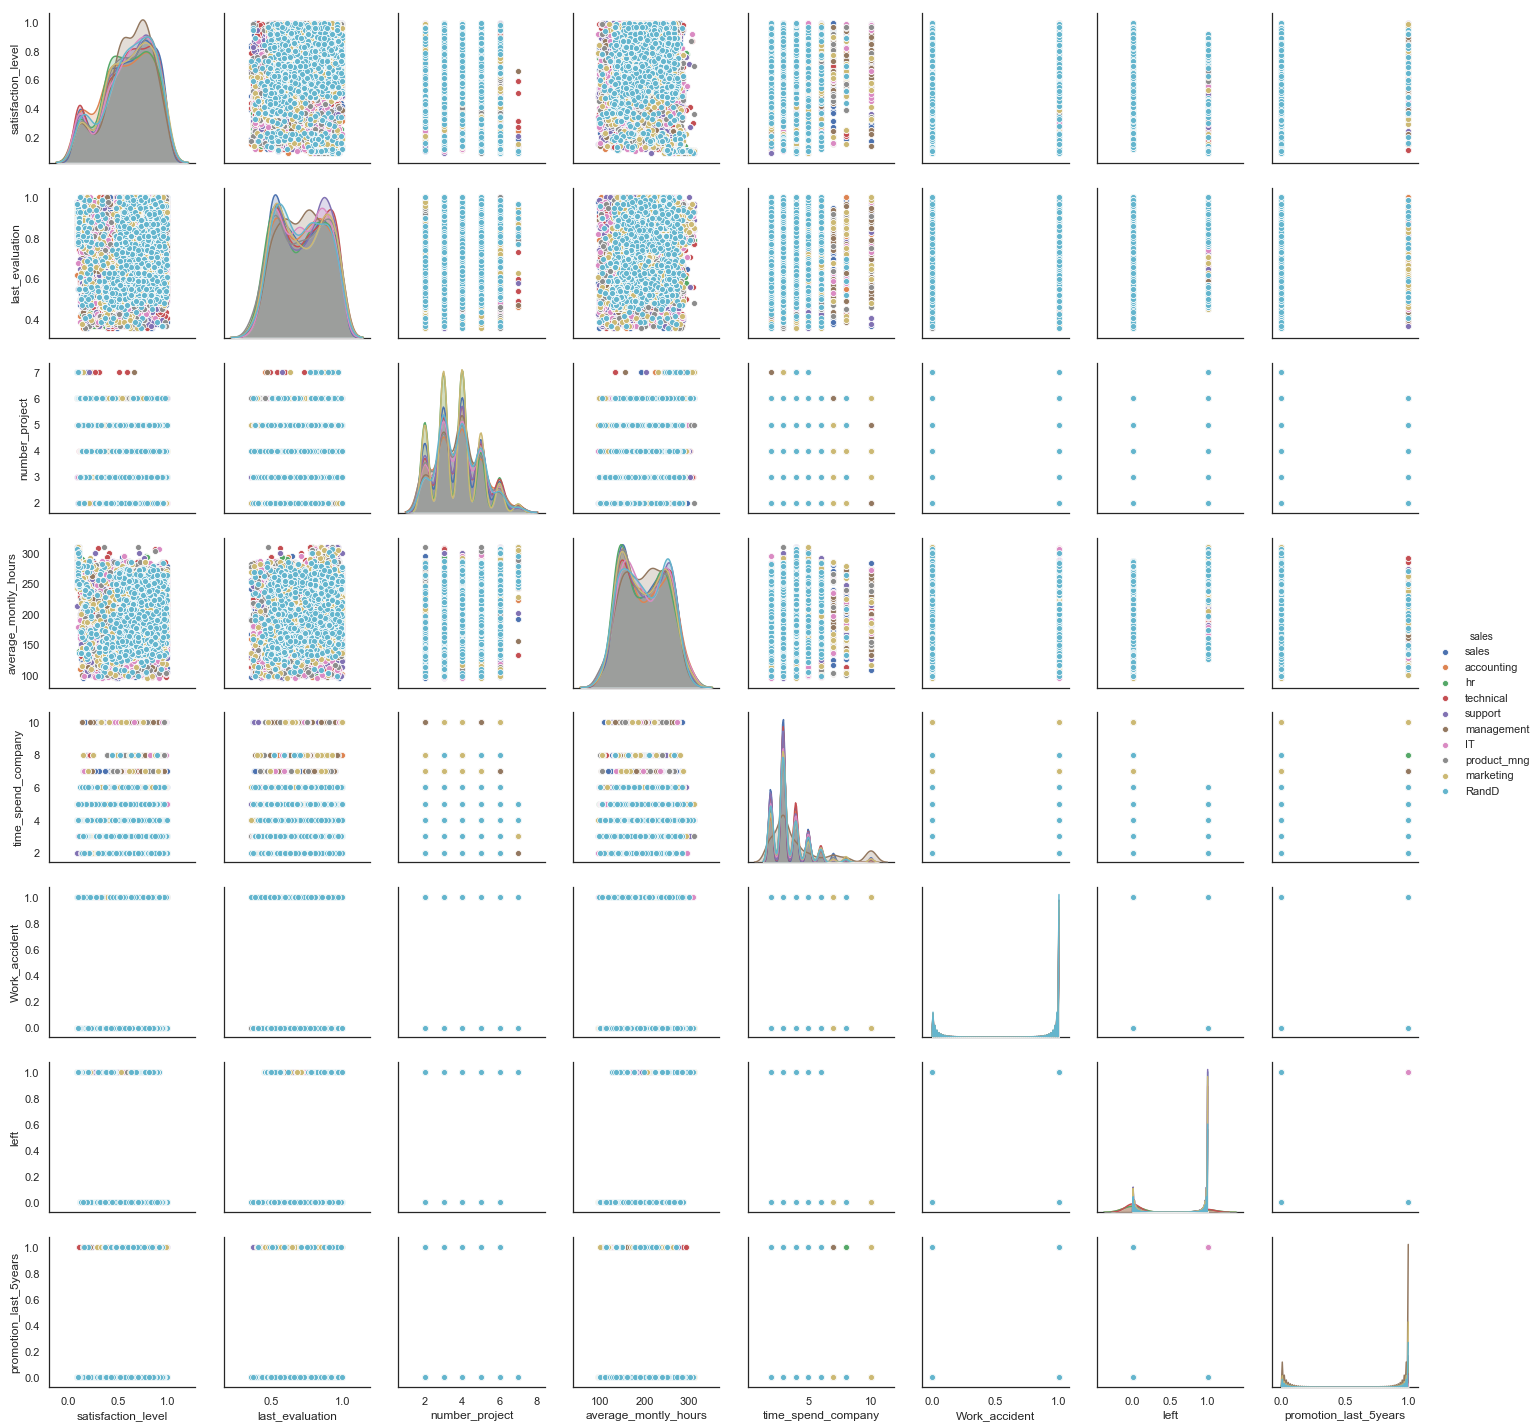

In [132]:
g = sns.pairplot(data=df_filtered3, hue='sales')
g = sns.pairplot(data=df, hue='sales')

## Посмотрим долю уволенных, подпадающих под критерии

In [135]:
print(df_filtered3['last_evaluation'].count()/df_left['last_evaluation'].count())

0.9106692803136376


In [ ]:
Повторим фильтр для основной выборки и оценим долю уволившихся в группе риска

In [139]:
df_risk=df[((df['last_evaluation']>0.75) & (df['average_montly_hours']>210)) | ((df['last_evaluation']<0.59)  & (df['average_montly_hours']<165))]
df_risk=df_risk[(
    (
        (
            (df_risk['last_evaluation']>0.80) & (df_risk['satisfaction_level']>0.7)
        ) 
        | 
        (
            (df_risk['last_evaluation']>0.76) & (df_risk['satisfaction_level']<0.17)
        )
    )
    | 
    (
        ((df_risk['last_evaluation']<0.6) & (df_risk['satisfaction_level']<0.5))
         & (df_risk['satisfaction_level']>0.35)
    )
      )]
df_risk=df_risk[(
    (
        (
           ((df_risk['average_montly_hours']<330) & (df_risk['satisfaction_level']<0.13))
         & ((df_risk['average_montly_hours']>240) & (df_risk['satisfaction_level']>0))
        ) 
        | 
        (
           ((df_risk['average_montly_hours']<170) & (df_risk['satisfaction_level']<0.5))
         & ((df_risk['average_montly_hours']>125) & (df_risk['satisfaction_level']>0.34))
        )
    )
    | 
    (
        ((df_risk['average_montly_hours']<279) & (df_risk['satisfaction_level']<0.95))
         & ((df_risk['average_montly_hours']>215) & (df_risk['satisfaction_level']>0.7))
    )
      )]
print(df_risk[df_risk['left']==1]['left'].count()/df_risk['left'].count())
print(df[df['left']==1]['left'].count()/df['left'].count())

0.8203834510595358
0.2380825388359224


В группе риска вероятность увольнения в 3,5 раза выше. Сравним метрики групп.

Объём данных: 3964


satisfaction_level   last_evaluation  \
Перевод                 Уровень удовлетворённости  Последняя оценка   
Минимум                                      0.09              0.36   
Медиана                                      0.43              0.83   
Среднее                                  0.495119          0.741423   
Максимум                                     0.94                 1   
Мода                                          0.1                 1   
Стандартное отклонение                   0.281438          0.199643   
Количество значений                            42                47   
Отсутствующие значения                          0                 0   
Выборсы за 3 сигмы                              0                 0   
Выборсы за 2 сигмы                              0                 0   

                             number_project             average_montly_hours  \
Перевод                 Количество проектов  Среднемесячное количество часов   
Минимум                                   2                              126   
Медиана                                   4                              233   
Среднее                             3.80853                          211.508   
Максимум                                  7                              310   
Мода                                      2                              135   
Стандартное отклонение              1.71784                          59.0386   
Количество значений                       6                              132   
Отсутствующие значения                    0                                0   
Выборсы за 3 сигмы                        0                                0   
Выборсы за 2 сигмы                        0                                0   

                       time_spend_company      Work_accident      left  \
Перевод                       Срок работы  Несчастный случай    Уволен   
Минимум                                 2                  0         0   
Медиана                                 3                  0         1   
Среднее                           3.75757           0.070888  0.820383   
Максимум                               10                  1         1   
Мода                                    3                  0         1   
Стандартное отклонение            1.08796           0.256638  0.383868   
Количество значений                     8                  2         2   
Отсутствующие значения                  0                  0         0   
Выборсы за 3 сигмы                     20                281         0   
Выборсы за 2 сигмы                    233                281       712   

                       promotion_last_5years  
Перевод                   Повышение за 5 лет  
Минимум                                    0  
Медиана                                    0  
Среднее                            0.0105954  
Максимум                                   1  
Мода                                       0  
Стандартное отклонение              0.102387  
Количество значений                        2  
Отсутствующие значения                     0  
Выборсы за 3 сигмы                        42  
Выборсы за 2 сигмы                        42

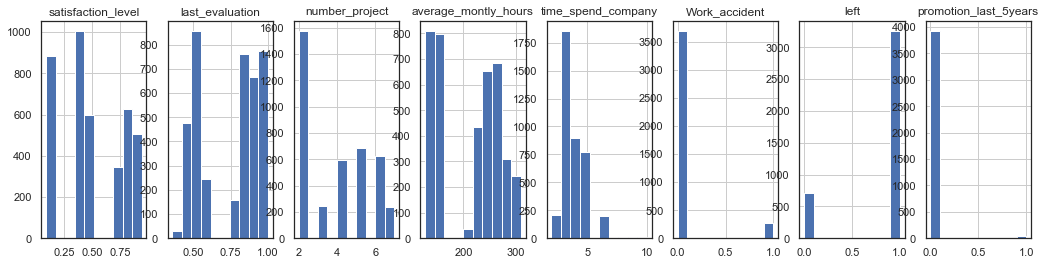

In [140]:
headers=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']
headers_rus=['Уровень удовлетворённости','Последняя оценка','Количество проектов','Среднемесячное количество часов','Срок работы','Несчастный случай','Уволен','Повышение за 5 лет']
spec2=headers_rus
k=[]
for i in headers:
    k+=[min(df_risk[i])]
spec2=[spec2,k]
k=[]
for i in headers:
    k+=[statistics.median(df_risk[i])]
spec2+=[k]
k=[]
for i in headers:
    k+=[statistics.mean(df_risk[i])]
spec2+=[k]
k=[]
for i in headers:
    k+=[max(df_risk[i])]
spec2+=[k]
k=[]
for i in headers:
    try:
        k+=[statistics.mode(df_risk[i])]
    except:
        k+=['-']
spec2+=[k]
k=[]
for i in headers:
    k+=[statistics.pstdev(df_risk[i])]
spec2+=[k]
k=[]
for i in headers:
    h=set()
    for n in df_risk[i]:
        h.add(n)
    k+=[len(h)]
spec2+=[k]
k=[]
for i in headers:
    k+=[df_risk[i].isnull().sum()]
spec2+=[k]
k=[]
for i in headers:
    mean = statistics.mean(df_risk[i])
    sigma = statistics.pstdev(df_risk[i])
    k+=[df_risk[i][df_risk[i]<=mean-3*sigma].count()+df_risk[i][df_risk[i]>=mean+3*sigma].count()]
spec2+=[k]
k=[]
l=1
for i in headers:
    l+=1
    mean = statistics.mean(df_risk[i])
    sigma = statistics.pstdev(df_risk[i])
    k+=[df_risk[i][df_risk[i]<=mean-2*sigma].count()+df_risk[i][df_risk[i]>=mean+2*sigma].count()]
    plt.subplot(1, len(headers)+1, l)
    df_risk[i].hist(figsize=(20,4), label=i)
    plt.title(i)
spec2+=[k]
print('Объём данных:',len(df_risk))
spec2=pd.DataFrame(spec2, index = ['Перевод','Минимум','Медиана', 'Среднее', 'Максимум', 'Мода', 'Стандартное отклонение', 'Количество значений', 'Отсутствующие значения', 'Выборсы за 3 сигмы', 'Выборсы за 2 сигмы'], columns=headers)
spec2

Объём данных: 14999


satisfaction_level   last_evaluation  \
Перевод                 Уровень удовлетворённости  Последняя оценка   
Минимум                                      0.09              0.36   
Медиана                                      0.64              0.72   
Среднее                                  0.612834          0.716102   
Максимум                                        1                 1   
Мода                                          0.1              0.55   
Стандартное отклонение                   0.248622          0.171163   
Количество значений                            92                65   
Отсутствующие значения                          0                 0   
Выборсы за 3 сигмы                              0                 0   
Выборсы за 2 сигмы                            888                77   

                             number_project             average_montly_hours  \
Перевод                 Количество проектов  Среднемесячное количество часов   
Минимум                                   2                               96   
Медиана                                   4                              200   
Среднее                             3.80305                           201.05   
Максимум                                  7                              310   
Мода                                      4                                -   
Стандартное отклонение              1.23255                          49.9414   
Количество значений                       6                              215   
Отсутствующие значения                    0                                0   
Выборсы за 3 сигмы                        0                                0   
Выборсы за 2 сигмы                      256                              248   

                       time_spend_company      Work_accident      left  \
Перевод                       Срок работы  Несчастный случай    Уволен   
Минимум                                 2                  0         0   
Медиана                                 3                  0         0   
Среднее                           3.49823            0.14461  0.238083   
Максимум                               10                  1         1   
Мода                                    3                  0         0   
Стандартное отклонение            1.46009           0.351707   0.42591   
Количество значений                     8                  2         2   
Отсутствующие значения                  0                  0         0   
Выборсы за 3 сигмы                    376                  0         0   
Выборсы за 2 сигмы                    564               2169         0   

                       promotion_last_5years  
Перевод                   Повышение за 5 лет  
Минимум                                    0  
Медиана                                    0  
Среднее                            0.0212681  
Максимум                                   1  
Мода                                       0  
Стандартное отклонение              0.144277  
Количество значений                        2  
Отсутствующие значения                     0  
Выборсы за 3 сигмы                       319  
Выборсы за 2 сигмы                       319

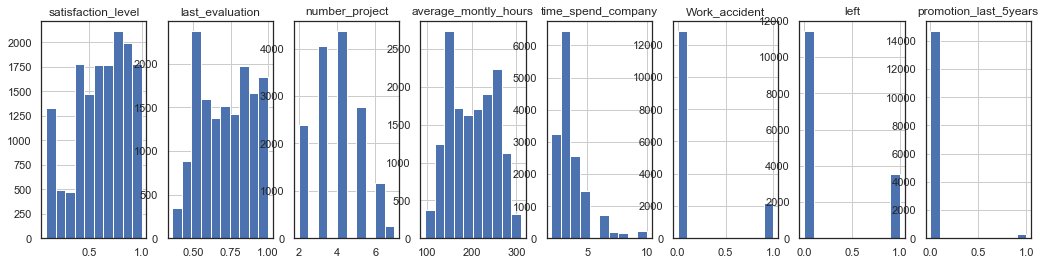

In [143]:
l=1
for i in headers:
    l+=1
    plt.subplot(1, len(headers)+1, l)
    df[i].hist(figsize=(20,4), label=i)
    plt.title(i)
print('Объём данных:',len(df))
spec=pd.DataFrame(spec, index = ['Перевод','Минимум','Медиана', 'Среднее', 'Максимум', 'Мода', 'Стандартное отклонение', 'Количество значений', 'Отсутствующие значения', 'Выборсы за 3 сигмы', 'Выборсы за 2 сигмы'], columns=headers)
spec

In [148]:
print('Выделена группа риска, её доля в выборке:',len(df_risk[df_risk['left']==0])/len(df[df['left']==0]))

Выделена группа риска, её доля в выборке: 0.06230311515575779


## Итоги

Среди сотрудников есть три группы риска, которые определяются диапазонами трёх параметров: давности повышения, уровня удовлетворённости, количества отработанных часов. В сумме группа риска доходит до 6,2% работаюших. Работникам, у которых возникают обнаруженные сочетания параметров рекомендуется выводить эти параметры из зоны риска изменяя нагрузку или повышая их.

# 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете